In [1]:
import pandas as pd

In [2]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
import numpy as np

In [25]:
x= data_ads["TV"]
y= data_ads["Sales"]
meanx= np.mean(x)
meany= np.mean(y)

In [26]:
data_ads["corrn"] = (x - meanx) * (y - meany)

In [27]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [28]:
data_ads["corr1"] = (x - meanx)**2

In [29]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [30]:
data_ads["corr2"] = (y - meany)**2

In [31]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [32]:
sumn= sum(data_ads["corrn"])
sumx= sum(data_ads["corr1"])
sumy= sum(data_ads["corr2"])

In [34]:
corrn= sumn/np.sqrt(sumx * sumy)

In [37]:
corrn

0.782224424861606

In [40]:
def corr_coeff(df, x, y):
    diffx= df[x] - np.mean(df[x])
    diffy= df[y] - np.mean(df[y])
    df["corrn"]= diffx * diffy
    df["corr1"] = diffx**2
    df["corr2"] = diffy**2
    corr_p= sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [41]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [42]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [44]:
cols= data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [46]:
for x in cols:
    for y in cols:
        corr = corr_coeff(data_ads, x, y)
        print(x + ", " + y + " :", corr)

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


In [48]:
import matplotlib.pyplot as plt

Text(0,0.5,'Ventas')

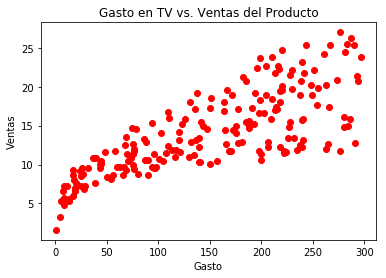

In [60]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs. Ventas del Producto")
plt.xlabel("Gasto")
plt.ylabel("Ventas")

Text(0,0.5,'Ventas')

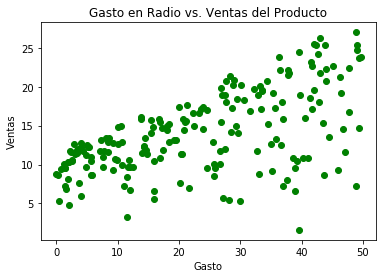

In [58]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs. Ventas del Producto")
plt.xlabel("Gasto")
plt.ylabel("Ventas")

Text(0,0.5,'Ventas')

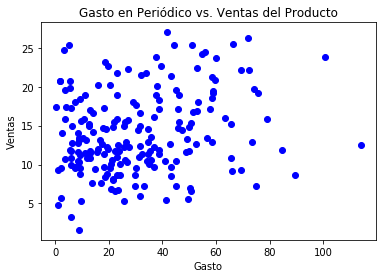

In [57]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs. Ventas del Producto")
plt.xlabel("Gasto")
plt.ylabel("Ventas")

In [62]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


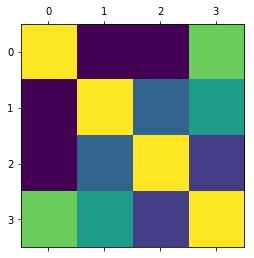

In [63]:
plt.matshow(data_ads.corr())